# Exploratory Data Analysis (EDA) for Parking Dataset

This notebook contains the exploratory data analysis for the parking dataset. The objective is to understand the data's distribution, detect any outliers, and observe any patterns or trends.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style("whitegrid")


In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Convert 'lastUpdated' to datetime format
df['lastUpdated'] = pd.to_datetime(df['lastUpdated'])

# Display the first few rows of the dataframe
df.head()


,systemCodeNumber,capacity,occupancy,lastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [3]:
# Summary Statistics
"""
## Summary Statistics

Before diving into visual explorations, let's first look at some summary statistics of our data.
"""
df.describe()

,capacity,occupancy,lastUpdated
count,35717.000000,35717.000000,35717
mean,1397.550130,642.228911,2016-11-11 18:11:47.708290304
min,220.000000,-8.000000,2016-10-04 07:46:28
25%,500.000000,210.000000,2016-10-24 16:33:03
50%,849.000000,446.000000,2016-11-11 14:00:21
75%,2009.000000,798.000000,2016-11-29 13:28:30
max,4675.000000,4327.000000,2016-12-19 16:30:35
std,1179.326833,656.955535,NaN


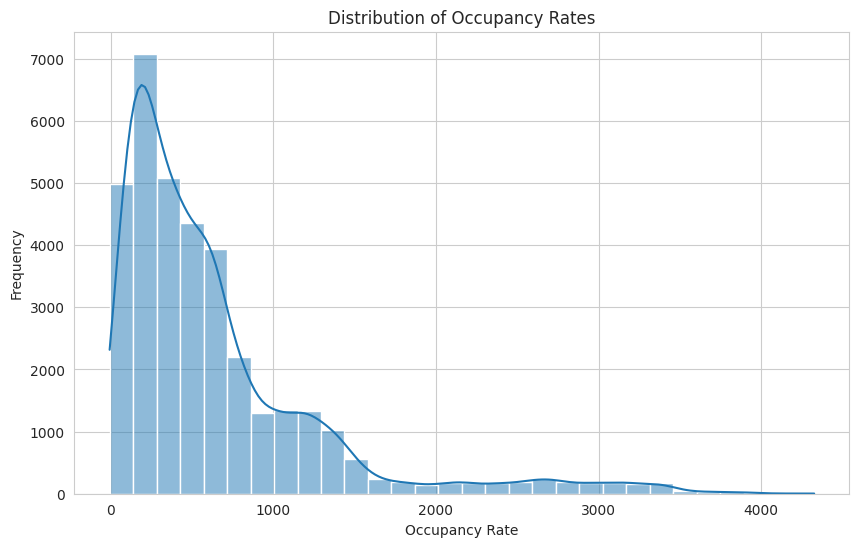

In [4]:

# Distribution of Occupancy Rates
"""
## Distribution of Occupancy Rates

A histogram is useful for visualizing how the occupancy rates are distributed across the dataset.
"""
plt.figure(figsize=(10, 6))
sns.histplot(df['occupancy'], bins=30, kde=True)
plt.title('Distribution of Occupancy Rates')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.savefig('figures/occupancy_distribution.png')  # Save the figure
plt.show()

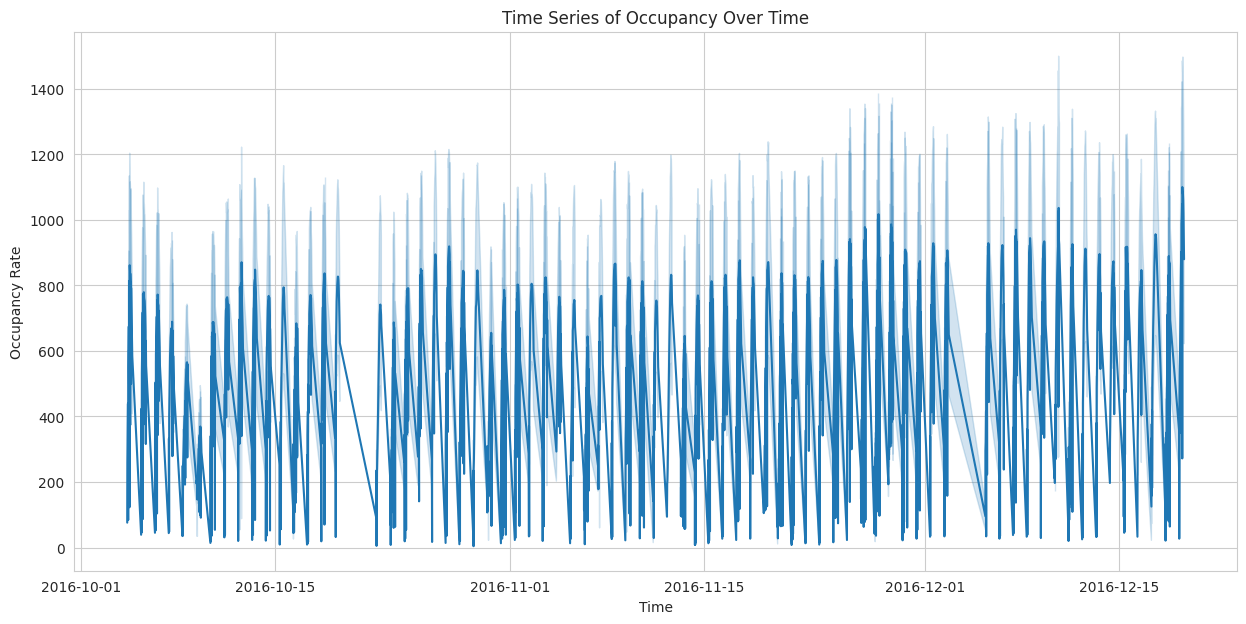

In [5]:

# Time Series Plot of Occupancy Over Time
"""
## Time Series Plot of Occupancy Over Time

To observe how occupancy changes over time, we'll plot a time series graph.
"""
plt.figure(figsize=(15, 7))
sns.lineplot(x=df['lastUpdated'], y=df['occupancy'])
plt.title('Time Series of Occupancy Over Time')
plt.xlabel('Time')
plt.ylabel('Occupancy Rate')
plt.savefig('figures/occupancy_time_series.png')  # Save the figure
plt.show()

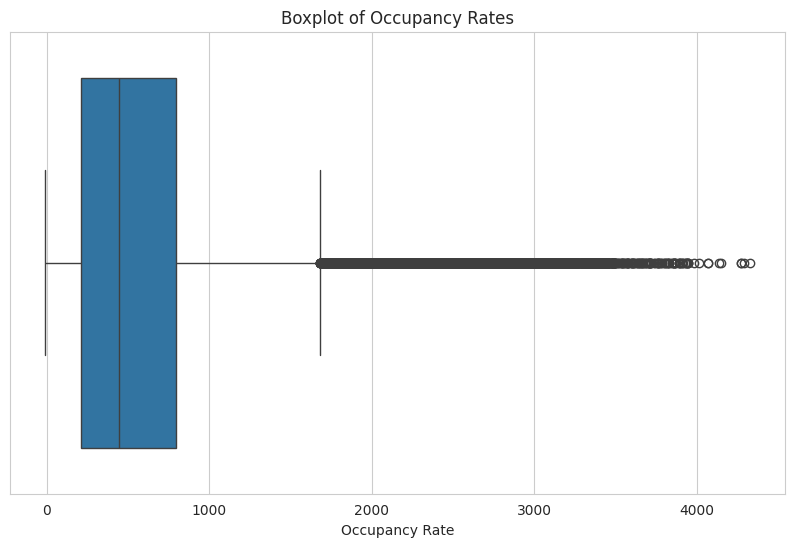

In [6]:

# Boxplot to Detect Outliers
"""
## Boxplot to Detect Outliers

Boxplots are great for visualizing the distribution of data and identifying outliers.
"""
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['occupancy'])
plt.title('Boxplot of Occupancy Rates')
plt.xlabel('Occupancy Rate')
plt.savefig('figures/occupancy_boxplot.png')  # Save the figure
plt.show()

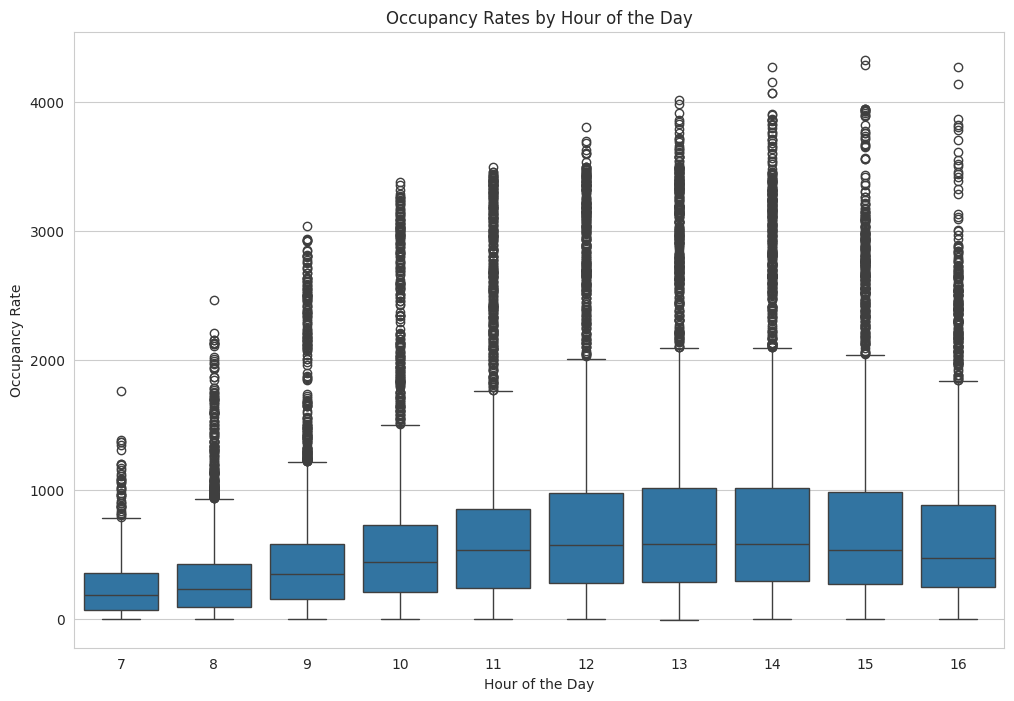

In [7]:

# Occupancy Rates by Hour of the Day
"""
## Occupancy Rates by Hour of the Day

We'll create a boxplot to visualize the distribution of occupancy rates by hour of the day.
"""
df['hour'] = df['lastUpdated'].dt.hour
plt.figure(figsize=(12, 8))
sns.boxplot(x='hour', y='occupancy', data=df)
plt.title('Occupancy Rates by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Occupancy Rate')
plt.savefig('figures/occupancy_by_hour.png')  # Save the figure
plt.show()

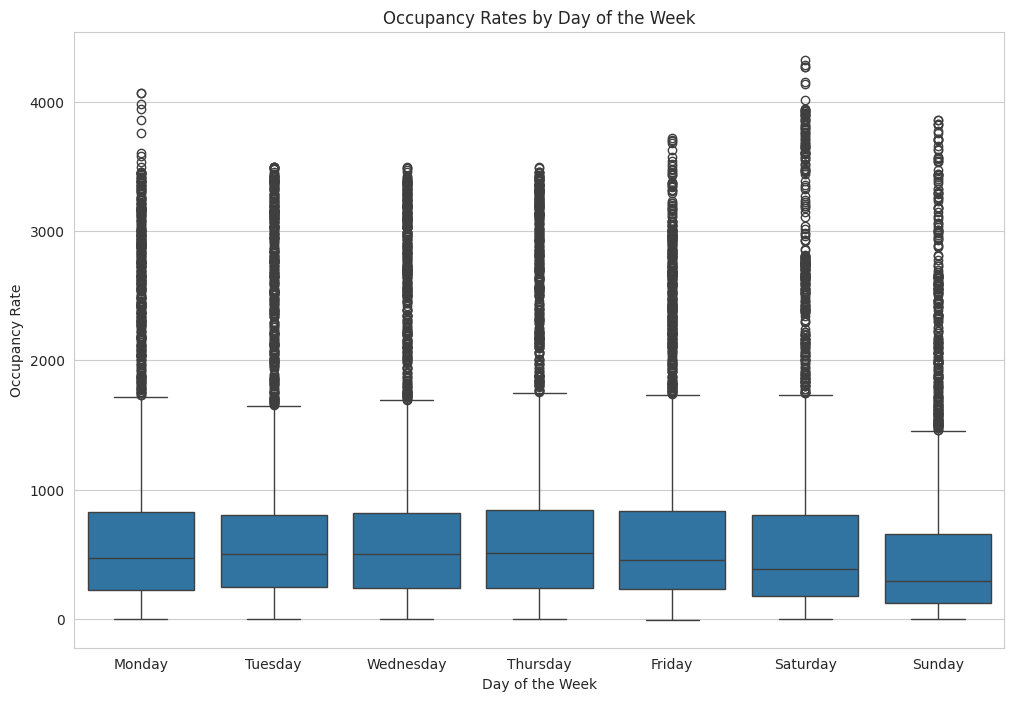

In [8]:

# Occupancy Rates by Day of the Week
"""
## Occupancy Rates by Day of the Week

Let's examine if there's a pattern in occupancy rates by day of the week.
"""
df['weekday'] = df['lastUpdated'].dt.day_name()
plt.figure(figsize=(12, 8))
sns.boxplot(x='weekday', y='occupancy', data=df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Occupancy Rates by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Occupancy Rate')
plt.savefig('figures/occupancy_by_weekday.png')  # Save the figure
plt.show()
